In [1]:
import pandas as pd
import re
import string
import nltk
import emoji

wn = nltk.WordNetLemmatizer()
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading Dataset

In [2]:
dataset = pd.read_csv('SMSSpamCollection.tsv',
                      names=['labels','content'],
                      sep='\t',header = None)

In [3]:
dataset.head()

,labels,content
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [4]:
dataset.shape

(5568, 2)

We have 2 features and 5568 Observation. The data is SMS dataset, with a label SPAM or HAM(Not SPAM). 

In [5]:
dataset.info

<bound method DataFrame.info of      labels                                            content
0       ham  I've been searching for the right words to tha...
1      spam  Free entry in 2 a wkly comp to win FA Cup fina...
2       ham  Nah I don't think he goes to usf, he lives aro...
3       ham  Even my brother is not like to speak with me. ...
4       ham                I HAVE A DATE ON SUNDAY WITH WILL!!
...     ...                                                ...
5563   spam  This is the 2nd time we have tried 2 contact u...
5564    ham               Will ü b going to esplanade fr home?
5565    ham  Pity, * was in mood for that. So...any other s...
5566    ham  The guy did some bitching but I acted like i'd...
5567    ham                         Rofl. Its true to its name

[5568 rows x 2 columns]>

In [6]:
dataset[dataset['content'].duplicated(keep=False)]

,labels,content
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,ham,As per your request 'Melle Melle (Oru Minnamin...
6,spam,WINNER!! As a valued network customer you have...
7,spam,Had your mobile 11 months or more? U R entitle...
9,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5520,spam,You are awarded a SiPix Digital Camera! call 0...
5531,ham,"I know you are thinkin malaria. But relax, chi..."
5535,ham,Just sleeping..and surfing
5549,ham,Hahaha..use your brain dear


We do have duplicates. It is always good idea to drop duplicates

In [7]:
#dataset.drop_duplicates(subset=['content'],keep='first', inplace=True)

In [8]:
dataset.shape

(5568, 2)

### Data Cleaning

In [9]:
def clean_text(text):
    
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'twitter+', '',  str(text)) # remove the twiiter
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic
    text = re.sub('\n', '',str(text))# remove \n from the text
    text = text.strip()
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    emoji.get_emoji_regexp().sub(u'', text)
    tokens = re.split('\W+', text)
    text = " ".join([wn.lemmatize(word) for word in tokens if word not in stopword])#lemmatization
#     text = [wn.lemmatize(word) for word in tokens if word not in stopword]
    
    
    return text


In [10]:
dataset.head()

,labels,content
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [11]:
dataset['cleaned_content'] = dataset['content'].apply(lambda x: clean_text(x))

C:\Users\admin\AppData\Local\Temp\ipykernel_8844\3193103632.py:15: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  emoji.get_emoji_regexp().sub(u'', text)


In [12]:
dataset.tail()

,labels,content,cleaned_content
5563,spam,This is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...
5564,ham,Will ü b going to esplanade fr home?,ü b going esplanade fr home
5565,ham,"Pity, * was in mood for that. So...any other s...",pity mood soany suggestion
5566,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like id interested buying s...
5567,ham,Rofl. Its true to its name,rofl true name


### Feature Engineering

In [13]:
dataset['body_len'] = dataset['content'].apply(lambda x: len(x) - x.count(" "))

In [14]:
dataset.head()

,labels,content,cleaned_content,body_len
0,ham,I've been searching for the right words to tha...,ive searching right word thank breather promis...,160
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly p win fa cup final tkts 21st...,128
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,49
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent,62
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28


In [15]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [16]:
dataset['punct%'] = dataset['content'].apply(lambda x: count_punct(x))

In [17]:
dataset.head()

,labels,content,cleaned_content,body_len,punct%
0,ham,I've been searching for the right words to tha...,ive searching right word thank breather promis...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly p win fa cup final tkts 21st...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,49,4.1
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28,7.1


### Ploting Feature Engineering

In [18]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

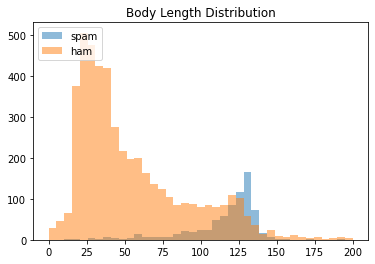

In [19]:
bins = np.linspace(0, 200, 40)

pyplot.title("Body Length Distribution")
pyplot.hist(dataset[dataset['labels']=='spam']['body_len'], bins, alpha=0.5, label='spam')
pyplot.hist(dataset[dataset['labels']=='ham']['body_len'], bins, alpha=0.5,  label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

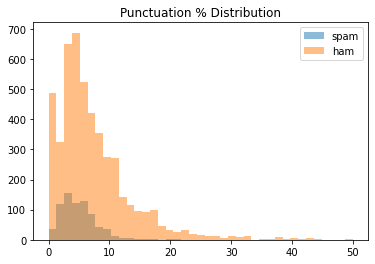

In [20]:
bins = np.linspace(0, 50, 40)

pyplot.hist(dataset[dataset['labels']=='spam']['punct%'], bins, alpha=0.5, label='spam')
pyplot.hist(dataset[dataset['labels']=='ham']['punct%'], bins, alpha=0.5,  label='ham')
pyplot.title("Punctuation % Distribution")
pyplot.legend(loc='upper right')
pyplot.show()

In [21]:
dataset.head()

,labels,content,cleaned_content,body_len,punct%
0,ham,I've been searching for the right words to tha...,ive searching right word thank breather promis...,160,2.5
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly p win fa cup final tkts 21st...,128,4.7
2,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though,49,4.1
3,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent,62,3.2
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday,28,7.1


### Vectorization

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
# tfidf_vect = TfidfVectorizer(analyzer=clean_text)
# X_tfidf = tfidf_vect.fit_transform(dataset['cleaned_content'])
# X_tfidf_df = pd.DataFrame(X_tfidf.toarray())

# X_features = pd.concat([dataset['body_len'], dataset['punct%'], ], axis=1)
# X_features.head()

Building Model: Random Forest with houldout testset

In [24]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(dataset[['cleaned_content']], dataset['labels'], test_size=0.2)

In [26]:
X_train

,cleaned_content
2471,princess like make love ltgt time per night ho...
2293,forwarded 21870000hi mailbox messaging sm aler...
3409,didnt search online let know
316,coffee cake guess
3231,yup ü
...,...
3078,great trip india bring light everyone project ...
3801,dude fakemy frnds got money thts im reffering ...
866,u want xmas 100 free text message new video ph...
1306,ok careful dont text drive


In [27]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)

X_tfidf_fit = tfidf_vect.fit(X_train['cleaned_content'])

tfidf_train = X_tfidf_fit.fit_transform(X_train['cleaned_content'])

tfidf_test = X_tfidf_fit.transform(X_test['cleaned_content'])

C:\Users\admin\AppData\Local\Temp\ipykernel_8844\3193103632.py:15: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  emoji.get_emoji_regexp().sub(u'', text)


In [28]:
X_test_vect = pd.DataFrame(tfidf_test.toarray())

X_train_vect = pd.DataFrame(tfidf_train.toarray())

In [29]:
X_train_vect.head()

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.491022,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
1,0.387088,0.43981,0.218247,0.269844,0.0,0.148444,0.155882,0.081977,0.084048,0.074537,...,0.065463,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
2,0.422914,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
3,0.256632,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0
4,0.186468,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.278669,0.0,0.0,0.0,0.0,0.0,0.85354,0.0,0.0


### Creating RandomForest Model

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)
rf_model = rf.fit(X_train_vect, y_train)

In [31]:
y_pred = rf_model.predict(X_test_vect)

In [32]:
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

### Evalution of Model

In [33]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred),3)))

Precision: 0.972 / Recall: 0.915 / Accuracy: 0.985


### Phase 2: tweet classification using Randomforest Model

In [34]:
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import os

In [35]:
# Twitter API Cred

consumer_key = 'Qjzvr3RaFDhgasMN0yWxrLV8a'
consumer_secret = 'wCQhmhk7h6j3XEU3S8MaAdXjWHMgn42QCS9PaEXwyGfokr1Xv6'
access_token = '1544391073472151552-A8kxtQBAOy7iJDyzcM2eeBNQFHBp47'
access_token_secret = 'QjIAZUiJEm3fNUzl1W8CCadzqCStYafSQ4j5RzvKlXCoQ'

In [36]:
# attempt authentication
try:
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth)
except:
    print("Error: Authentication Failed")

In [37]:
search_words = "ukrainerussiawar,ukraine,russia-filter:retweets" 

In [38]:
#Collect tweets
tweets = tweepy.Cursor(api.search_tweets,
              q=search_words,
              lang="en").items(900)

In [39]:
tweets

In [40]:
# creting a list of tweets with only the varibles required for analysis
tweets = [[tweet.text] for tweet in tweets]

In [41]:
# converting tweet text to dataframe
tweet_df = pd.DataFrame(data=tweets, 
                    columns=['text'])
tweet_df.head()

,text
0,🇲🇩 Moldova fears war with Russia.\n\nThis is a...
1,"BRICS is real and gonna be an issue for us, I ..."
2,13. #Russian Navy's ships struck the territor...
3,"“#Russia, within the framework of the grain de..."
4,The Illuminati playbook can be found in the Pr...


In [42]:
tweet_df['cleaned_text'] = tweet_df['text'].apply(lambda x: clean_text(x))

C:\Users\admin\AppData\Local\Temp\ipykernel_8844\3193103632.py:15: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  emoji.get_emoji_regexp().sub(u'', text)


In [43]:
tweet_df.head()

,text,cleaned_text
0,🇲🇩 Moldova fears war with Russia.\n\nThis is a...,moldova fear war russiathis risk still hypoth...
1,"BRICS is real and gonna be an issue for us, I ...",brics real gonna issue u guess u imperialism g...
2,13. #Russian Navy's ships struck the territor...,13 russian navy ship struck territory odessa p...
3,"“#Russia, within the framework of the grain de...",russia within framework grain deal assume obl...
4,The Illuminati playbook can be found in the Pr...,illuminati playbook found protocol wise men zi...


In [44]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          900 non-null    object
 1   cleaned_text  900 non-null    object
dtypes: object(2)
memory usage: 14.2+ KB


## Phase 2.1: Overall Tweet Analysis

### Polarity and Sentiment Analysis

In [45]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [46]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

In [47]:
tweet_df['Subjectivity'] = tweet_df['cleaned_text'].apply(getSubjectivity)
tweet_df['Polarity'] = tweet_df['cleaned_text'].apply(getPolarity)
tweet_df.head()

,text,cleaned_text,Subjectivity,Polarity
0,🇲🇩 Moldova fears war with Russia.\n\nThis is a...,moldova fear war russiathis risk still hypoth...,0.000000,0.000000
1,"BRICS is real and gonna be an issue for us, I ...",brics real gonna issue u guess u imperialism g...,0.433333,0.066667
2,13. #Russian Navy's ships struck the territor...,13 russian navy ship struck territory odessa p...,0.000000,0.000000
3,"“#Russia, within the framework of the grain de...",russia within framework grain deal assume obl...,0.000000,0.000000
4,The Illuminati playbook can be found in the Pr...,illuminati playbook found protocol wise men zi...,0.900000,0.700000


In [48]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

tweet_df['Analysis_Polarity'] = tweet_df['Polarity'].apply(get_Polarity_Analysis)

tweet_df['Analysis_Subjectivity'] = tweet_df['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
tweet_df.head()


,text,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,🇲🇩 Moldova fears war with Russia.\n\nThis is a...,moldova fear war russiathis risk still hypoth...,0.000000,0.000000,Neutral,Fact
1,"BRICS is real and gonna be an issue for us, I ...",brics real gonna issue u guess u imperialism g...,0.433333,0.066667,Positive,Opinion
2,13. #Russian Navy's ships struck the territor...,13 russian navy ship struck territory odessa p...,0.000000,0.000000,Neutral,Fact
3,"“#Russia, within the framework of the grain de...",russia within framework grain deal assume obl...,0.000000,0.000000,Neutral,Fact
4,The Illuminati playbook can be found in the Pr...,illuminati playbook found protocol wise men zi...,0.900000,0.700000,Positive,Opinion


In [49]:
import seaborn as sns

In [50]:
# Show the value counts
tweet_df['Analysis_Polarity'].value_counts()

Neutral     518
Positive    225
Negative    157
Name: Analysis_Polarity, dtype: int64

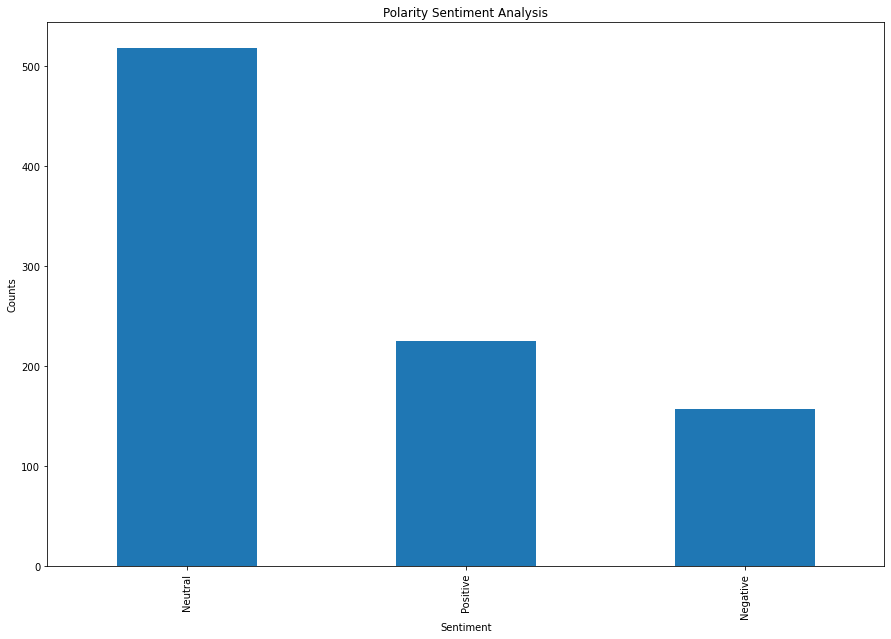

In [51]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

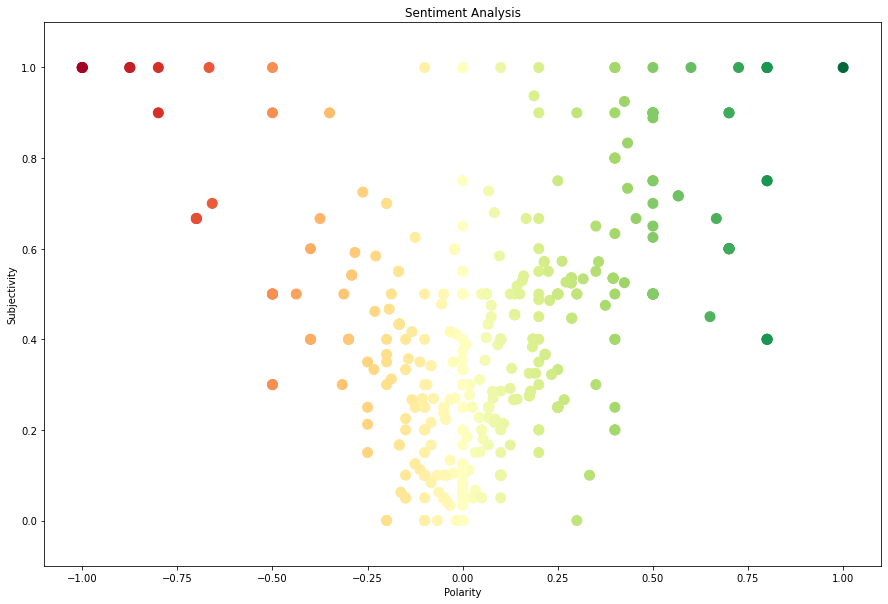

(None,)

In [52]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(tweet_df['Polarity'], tweet_df['Subjectivity'], c=tweet_df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

### Subjective Analysis

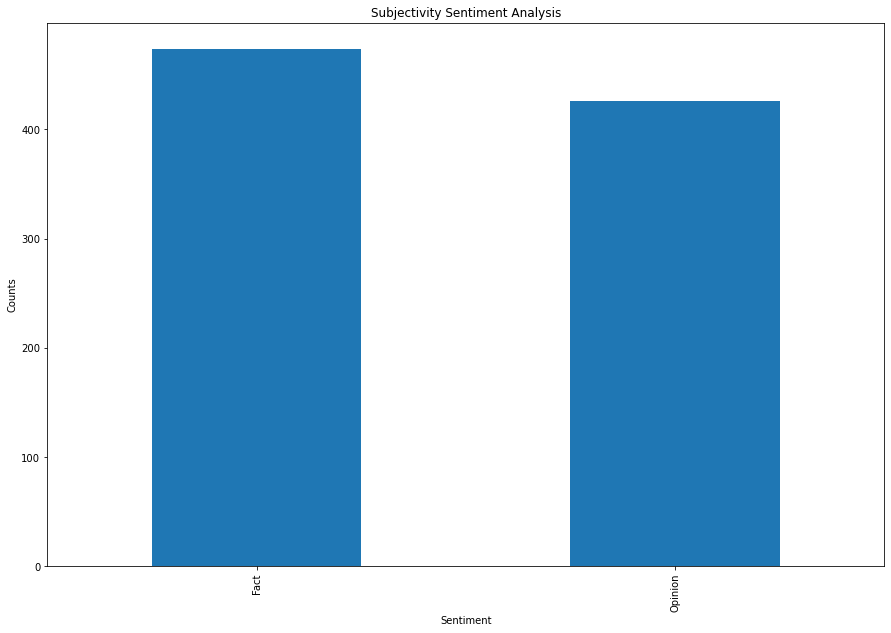

In [53]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

We will be classifing tweets as SPAM or NOT and we'll again do Tweet Analysis on Each Category of Tweet. 
* tweet_ham_df
* tweet_spam_df


### Vectorization of Tweet

In [54]:
tfidf_test = X_tfidf_fit.transform(tweet_df['cleaned_text'])


X_test_vect = pd.DataFrame(tfidf_test.toarray())

C:\Users\admin\AppData\Local\Temp\ipykernel_8844\3193103632.py:15: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  emoji.get_emoji_regexp().sub(u'', text)


### Vecotrization of tweet data

In [55]:
X_test_vect

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,0.412461,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.123281,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.475619,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.118465,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.421082,0.000000,0.115110,0.000000,0.126607,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.114416,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.377099,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.409517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.061201,0.146873,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,0.172154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
896,0.368824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.200434,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
897,0.483815,0.133263,0.000000,0.122645,0.000000,0.134937,0.141697,0.0,0.000000,0.0,...,0.238025,0.065731,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
898,0.406087,0.000000,0.203519,0.000000,0.000000,0.103820,0.000000,0.0,0.000000,0.0,...,0.000000,0.202294,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
y_test = rf_model.predict(X_test_vect)

In [57]:
tweet_df['label'] = y_test

* Value Counts of SPAM and not SPAM

In [58]:
tweet_df['label'].value_counts()

ham     869
spam     31
Name: label, dtype: int64

## Phase 2.2: Classified SPAM Tweet Analysis

### List of Tweets classified SPAM

In [59]:
tweet_spam_df = tweet_df[tweet_df['label']=='spam']
tweet_spam_df.head()

,text,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,label
53,"Russia has taken 448,000 children out of Ukrai...",russia taken 448000 child ukraine russian prop...,0.050000,0.000000,Neutral,Opinion,spam
92,The New York Times Discovers Ukraine’s Neo-Naz...,new york time discovers ukraine neonazis war20...,0.454545,0.136364,Positive,Opinion,spam
99,"#UKRAINERUSSIAWAR. By 2019, Kiev was preparing...",ukrainerussiawar 2019 kiev preparing war mosco...,0.000000,0.000000,Neutral,Fact,spam
100,"#UKRAINERUSSIAWAR. By 2019, Kiev was preparing...",ukrainerussiawar 2019 kiev preparing war mosco...,0.000000,0.000000,Neutral,Fact,spam
101,"#UKRAINERUSSIAWAR. By 2019, Kiev was preparing...",ukrainerussiawar 2019 kiev preparing war mosco...,0.000000,0.000000,Neutral,Fact,spam


### SPAM CLassified: Polarity and Sentiment Analysis

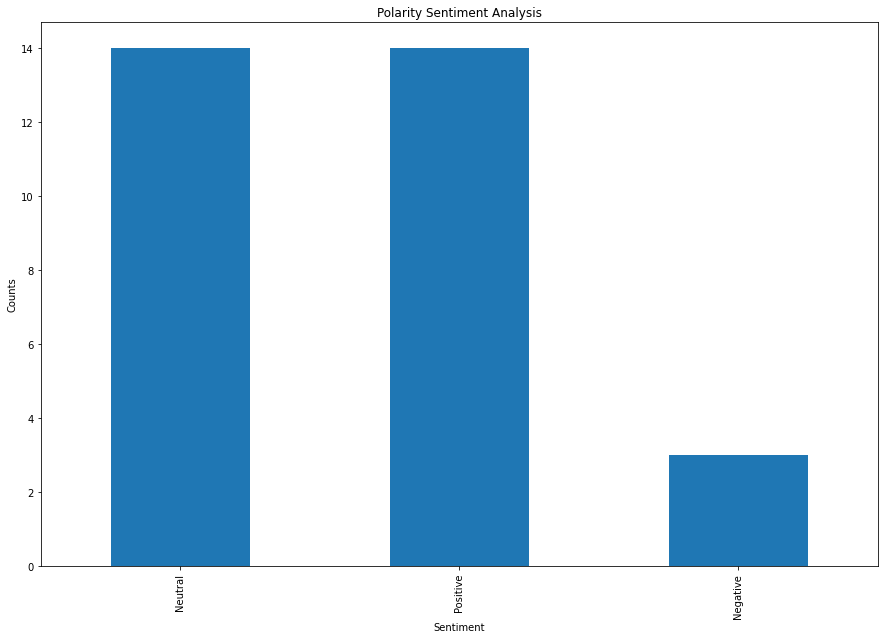

In [60]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_spam_df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

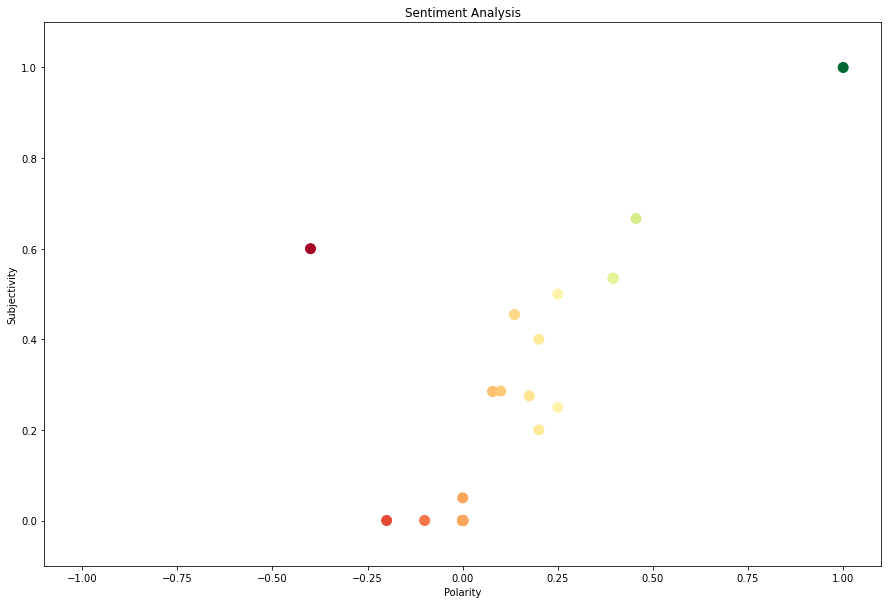

(None,)

In [61]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(tweet_spam_df['Polarity'], tweet_spam_df['Subjectivity'], c=tweet_spam_df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

### SPAM Classified: Subjectivy Analysis

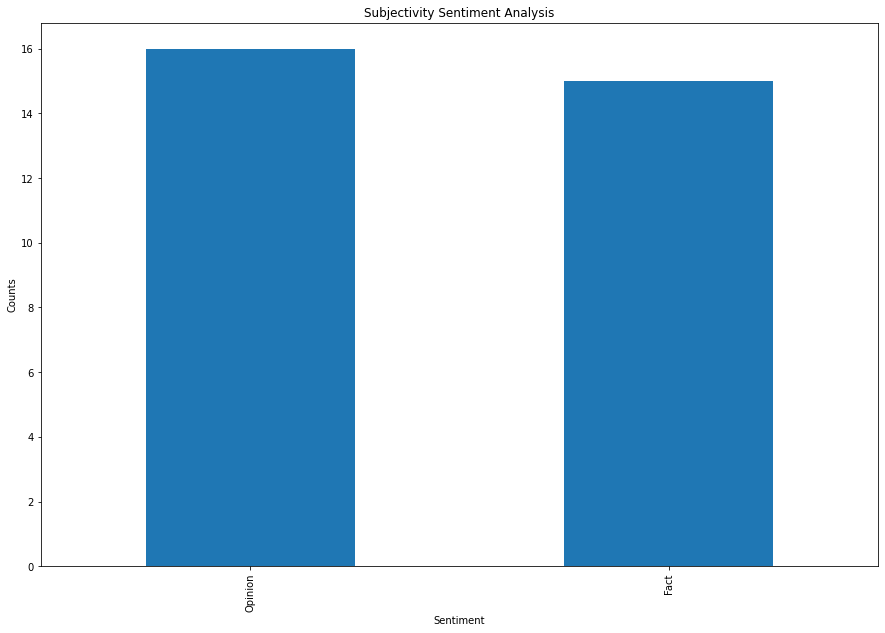

In [62]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_spam_df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

## Phase 2.3: Classified NOT SPAM (HAM) Tweet Analysis

In [63]:
tweet_ham_df = tweet_df[tweet_df['label']!='spam']
tweet_ham_df.head()

,text,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,label
0,🇲🇩 Moldova fears war with Russia.\n\nThis is a...,moldova fear war russiathis risk still hypoth...,0.000000,0.000000,Neutral,Fact,ham
1,"BRICS is real and gonna be an issue for us, I ...",brics real gonna issue u guess u imperialism g...,0.433333,0.066667,Positive,Opinion,ham
2,13. #Russian Navy's ships struck the territor...,13 russian navy ship struck territory odessa p...,0.000000,0.000000,Neutral,Fact,ham
3,"“#Russia, within the framework of the grain de...",russia within framework grain deal assume obl...,0.000000,0.000000,Neutral,Fact,ham
4,The Illuminati playbook can be found in the Pr...,illuminati playbook found protocol wise men zi...,0.900000,0.700000,Positive,Opinion,ham


### NOT SPAM CLassified: Polarity and Sentiment Analysis

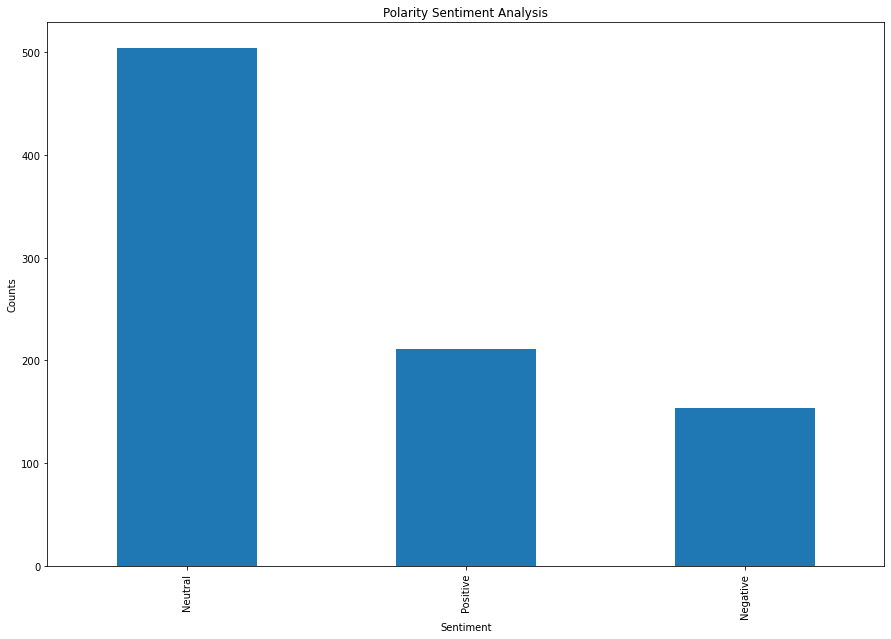

In [64]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_ham_df['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

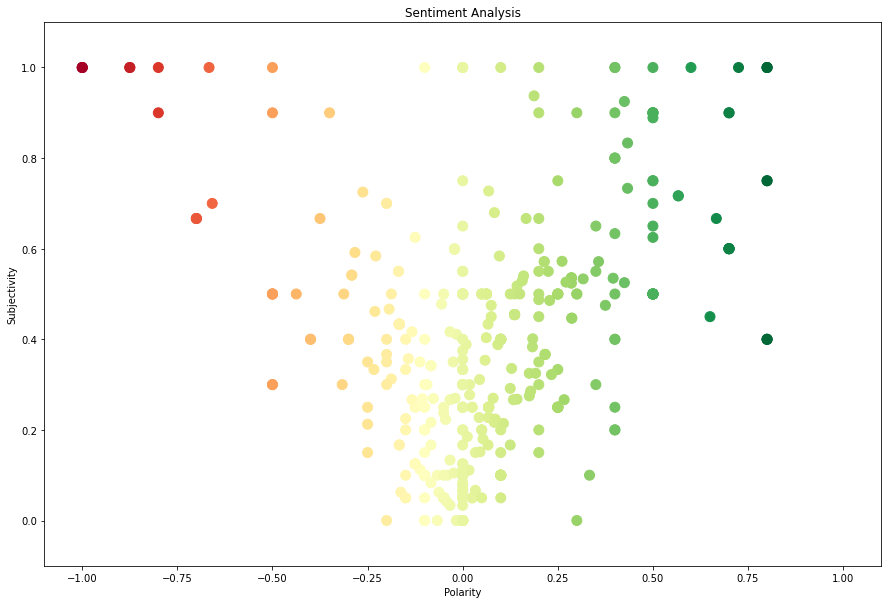

(None,)

In [65]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(tweet_ham_df['Polarity'], tweet_ham_df['Subjectivity'], c=tweet_ham_df['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

### NOT SPAM Classified: Subjectivy Analysis

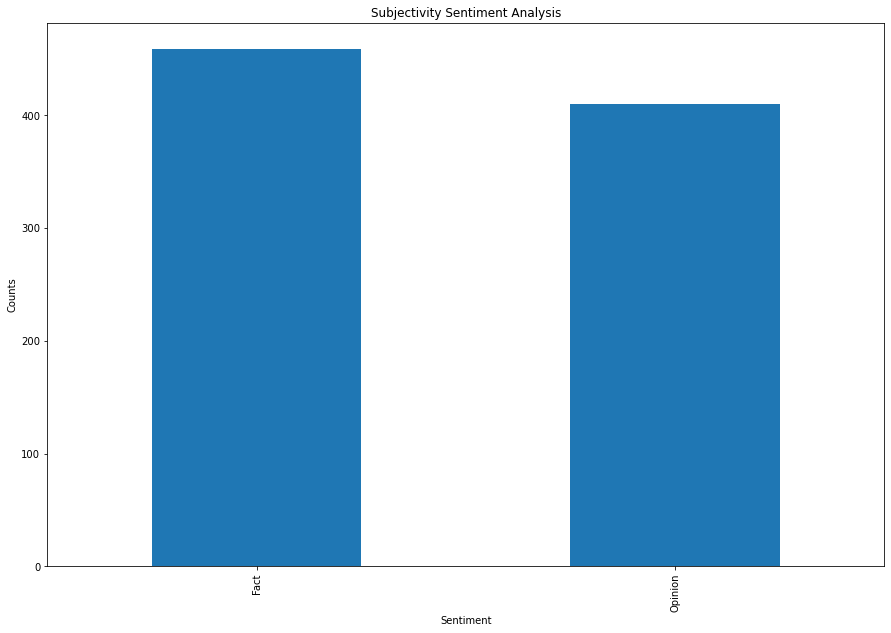

In [66]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweet_ham_df['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()